# Case study with mixed images using the FICA implementation

In [2]:
#using Pkg
#Pkg.add("ImageView")
using Images, FileIO, Colors

## Loading the test images and converting them to a grayscale image
For this case study we used 2 cat pictures, they will be refered to as cat one and cat two by
order of appearance

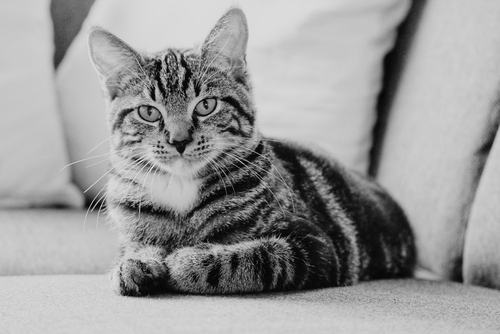

In [3]:
cat_one = load("cat_one_resize.jpg")
cat_oneg = Gray.(cat_one)

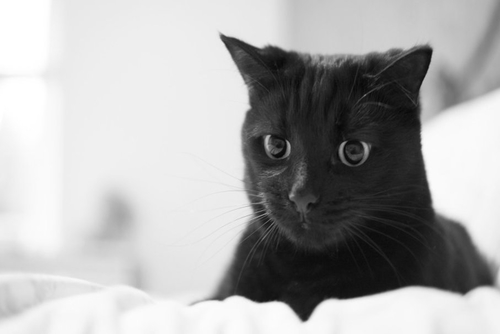

In [4]:
cat_two = load("cat_two_resize.jpg")
cat_twog = Gray.(cat_two)

## Mixing the images together to create 2 mixed images
For each image we use a different factor ( array A )
the first mixed image has a stronger presence from cat two and the second image a stronger presence from cat one

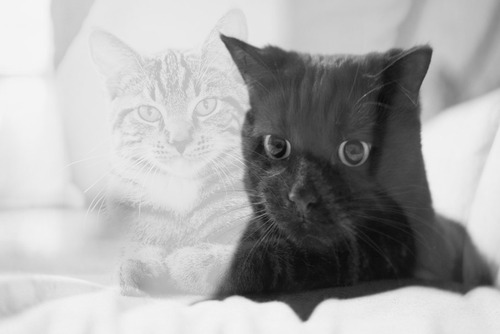

In [5]:
using LinearAlgebra
#convert image to array
mat_one = convert(Array{Float64},cat_oneg);
mat_two = convert(Array{Float64},cat_twog);
#get rows and column to later reconstruct the mixed image
rows,col = size(mat_one)
#convert 2D images to 1D (vector)
vec_one = vec(mat_one)';
vec_two = vec(mat_two)';

S = vcat(vec_one , vec_two)';

#generate first mixed signal
#factor used for the image
A = [0.2 , 0.8] 

X = (S .* A')'

X = X[1,:,]+X[2,:,]

imageX = reshape(X,rows,col)
save("mix_image_one.jpg",imageX)
load("mix_image_one.jpg")

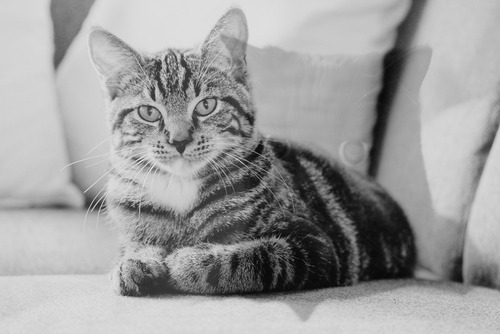

In [6]:
#generate second mixed signal
#factor used for the image
A = [0.8 , 0.2] 

Z = (S .* A')'

Z = Z[1,:,]+Z[2,:,]
mixed_signal = hcat(X,Z);
imageZ = reshape(Z,rows,col)
save("mix_image_two.jpg",imageZ)
load("mix_image_two.jpg")


## Applying the FICA algorithm

In [7]:
include("fastICA.jl")
  
W = fastICA.whiten(mixed_signal)
X1 = mixed_signal * W'  
a = fastICA.fast_ica(200,2,Array(X1'),0.0001,1.,true)
K = a * W
S = K * mixed_signal'

Random matrix = [1.02081 0.408655; -1.92523 -0.756068]
wp after normalize = [0.928373, 0.37165]
/////
/////


wx = [-3.66677 -3.67901 -3.67901 -3.67901 -3.69126 -3.69126 -3.7035 -3.7035 -3.69126 -3.69126 -3.69126 -3.67901 -3.67901 -3.67901 -3.66677 -3.66677 -3.65453 -3.65453 -3.65453 -3.65453 -3.65453 -3.65453 -3.65453 -3.65453 -3.65453 -3.65453 -3.65453 -3.65453 -3.65453 -3.65453 -3.65453 -3.65453 -3.65453 -3.65453 -3.66677 -3.66677 -3.67901 -3.67901 -3.67901 -3.67901 -3.67901 -3.67901 -3.67901 -3.67901 -3.67901 -3.67901 -3.67901 -3.67901 -3.67901 -3.67901 -3.67901 -3.67901 -3.66677 -3.66677 -3.66677 -3.66677 -3.66677 -3.66677 -3.66677 -3.66677 -3.66677 -3.66677 -3.64228 -3.65453 -3.6497 -3.64488 -3.64488 -3.64005 -3.64005 -3.64747 -3.64747 -3.65006 -3.64041 -3.63335 -3.61665 -3.60959 -3.59994 -3.60476 -3.64113 -3.63854 -3.65784 -3.66749 -3.64783 -3.65748 -3.65489 -3.64747 -3.64005 -3.64005 -3.64005 -3.63746 -3.63746 -3.63746 -3.6497 -3.6497 -3.64228 -3.63746 -3.64228 -3.64228 -3.64228 -3.64228 -3.64228 -3.64228 -3.64228 -3.64228 -3.63004 -3.6178 -3.63004 -3.63004 -3.6178 -3.6178 -3.63004 -3.

9162 -3.69162 -3.69162 -3.67937 -3.67455 -3.67714 -3.67714 -3.66007 -3.65525 -3.6456 -3.63595 -3.60923 -3.6044 -3.58734 -3.58251 -3.59958 -3.6044 -3.60923 -3.6237 -3.63335 -3.63818 -3.66007 -3.65748 -3.67455 -3.67195 -3.66454 -3.67678 -3.67678 -3.67678 -3.66936 -3.66936 -3.66936 -3.67419 -3.67419 -3.67419 -3.67419 -3.67419 -3.67419 -3.67419 -3.66936 -3.66936 -3.66936 -3.66936 -3.65712 -3.65229 -3.62781 -3.64005 -3.62781 -3.62781 -3.62298 -3.62298 -3.61074 -3.5985 -3.5985 -3.61074 -3.61074 -3.61074 -3.61074 -3.62298 -3.62298 -3.62298 -3.62298 -3.62298 -3.61074 -3.61074 -3.60591 -3.59367 -3.59367 -3.59367 -3.58143 -3.58143 -3.56919 -3.56919 -3.56919 -3.56919 -3.56436 -3.56436 -3.56436 -3.55212 -3.56436 -3.56919 -3.56919 -3.55694 -3.55694 -3.55694 -3.5447 -3.5447 -3.53246 -3.52021 -3.52504 -3.53728 -3.5447 -3.53246 -3.52021 -3.5447 -3.56919 -3.5447 -3.5447 -3.53246 -3.52021 -3.50797 -3.50797 -3.50797 -3.48348 -3.48348 -3.48348 -3.48348 -3.47124 -3.48348 -3.47124 -3.459 -3.47124 -3.459 -3.

-3.45266 -3.45266 -3.4649 -3.4649 -3.4649 -3.4649 -3.4649 -3.44042 -3.44042 -3.42818 -3.44524 -3.44524 -3.42076 -3.42076 -3.40851 -3.40851 -3.39627 -3.40851 -3.42076 -3.40851 -3.42076 -3.39627 -3.38403 -3.38403 -3.38403 -3.37179 -3.37179 -3.35954 -3.3473 -3.35954 -3.35954 -3.35212 -3.33988 -3.3154 -3.3154 -3.30315 -3.27384 -3.27384 -3.27384 -3.23711 -3.22487 -3.20521 -3.18072 -3.16848 -3.14399 -3.11951 -3.13175 -3.09502 -3.08278 -3.07053 -3.09502 -3.03381 -3.03381 -3.03381 -3.00932 -2.97259 -2.9481 -2.96035 -2.93586 -2.89913 -2.87465 -2.89913 -2.91137 -2.91137 -2.9481 -2.93586 -2.92362 -2.92362 -2.9481 -2.97259 -2.98483 -3.00932 -3.05829 -3.05829 -3.07053 -3.09502 -3.10726 -3.10726 -3.14399 -3.13175 -3.14399 -3.15624 -3.18072 -3.18072 -3.21745 -3.14399 -3.45007 -3.54801 -3.20521 -3.24194 -3.25418 -3.25418 -3.22969 -3.25418 -3.27867 -3.27867 -3.27125 -3.26642 -3.25418 -3.22969 -3.21745 -3.20521 -3.18072 -3.18072 -3.14399 -3.18072 -3.22969 -3.29091 -3.26642 -3.26642 -3.26642 -3.22969 -3.

3.5725 -3.5725 -3.5725 -3.5725 -3.5725 -3.5725 -3.56026 -3.54801 -3.54801 -3.54801 -3.54801 -3.53577 -3.53577 -3.53577 -3.52353 -3.52353 -3.51128 -3.51128 -3.52835 -3.51611 -3.50387 -3.50387 -3.51611 -3.50387 -3.49162 -3.47938 -3.45489 -3.45489 -3.45489 -3.45489 -3.46714 -3.46714 -3.45489 -3.43041 -3.43523 -3.43523 -3.43523 -3.43523 -3.43523 -3.42299 -3.42299 -3.42299 -3.3985 -3.3985 -3.37402 -3.38626 -3.38626 -3.37402 -3.36177 -3.33729 -3.49645 -3.48421 -3.33729 -3.36177 -3.36177 -3.34953 -3.60664 -3.3128 -3.27607 -3.28832 -3.27607 -3.26383 -3.25159 -3.23934 -3.41075 -3.15364 -3.16589 -3.12916 -3.09243 -3.11691 -3.08018 -3.0557 -3.0557 -3.03121 -3.01897 -2.99448 -2.99931 -2.98224 -2.97 -2.94069 -2.87947 -2.89654 -2.81084 -2.80601 -2.75704 -2.62237 -3.56026 -3.05829 -2.25025 -2.26249 -2.2087 -2.08627 -2.04954 -1.93193 -1.8414 -1.68966 -1.60396 -1.49377 -1.42032 -1.37876 -1.31755 -1.24409 -1.29789 -1.26116 -1.17063 -1.53792 -2.46357 -3.11245 -3.03417 -2.73291 -2.59342 -2.69878 -2.89467 

56991 -3.64336 -3.63112 -3.60664 -3.56991 -3.59439 -3.68009 -3.72907 -3.61888 -3.68009 -3.69234 -3.70458 -3.65561 -3.64336 -3.64336 -3.70458 -3.66785 -3.56991 -3.63112 -3.69234 -3.72907 -3.69234 -3.71682 -3.70458 -3.64336 -3.65561 -3.63112 -3.71682 -3.65561 -3.65561 -3.61888 -3.45972 -3.37402 -3.3128 -3.23934 -3.21486 -3.3128 -3.3985 -3.39368 -3.49162 -3.64596 -3.18072 -3.09502 -3.3154 -3.53095 -3.64855 -3.47715 -3.44784 -3.60217 -3.66339 -3.71495 -3.74686 -3.71754 -3.7372 -3.73238 -3.7398 -3.73497 -3.69601 -3.71085 -3.67671 -3.67448 -3.67707 -3.56206 -3.49379 -3.5012 -3.49155 -3.36689 -3.24223 -3.14688 -3.15689 -3.18879 -3.1669 -3.1669 -3.14501 -3.22106 -3.29451 -3.31418 -3.33384 -3.30453 -3.32901 -3.3854 -3.44662 -3.52007 -3.50301 -3.43697 -3.2804 -3.31713 -3.26816 -3.10158 -3.18728 -3.29747 -3.29747 -3.32195 -3.30971 -3.18728 -3.2485 -3.29747 -3.22401 -3.32678 -3.33902 -3.24108 -3.19211 -3.21659 -3.20435 -3.20435 -3.22883 -3.2485 -3.25815 -3.28004 -3.31158 -3.32123 -3.32829 -3.36725

318 -3.55766 -3.10467 -3.03121 -3.28832 -3.33246 -3.1733 -3.21003 -3.58957 -2.61012 -1.99797 -2.34078 -2.84274 -2.94069 -3.35695 -3.58957 -3.0876 -3.29573 -3.51611 -3.78546 -3.18072 -2.80119 -3.46231 -3.49904 -3.54801 -3.5725 -3.60923 -3.60923 -3.49904 -3.4868 -3.47715 -2.85275 -3.19556 -3.57027 -2.84793 -2.87241 -3.05123 -3.25937 -3.54837 -3.37697 -3.38921 -3.37215 -3.46527 -3.47268 -3.27939 -3.43372 -3.14731 -3.08127 -3.41925 -3.42184 -3.31907 -2.734 -3.35357 -2.17341 -1.41693 -2.05616 -2.40156 -2.8449 -1.2559 -1.39799 -1.25367 -1.34196 -1.51337 -1.88808 -2.13553 -2.47351 -2.91685 -2.961 -3.15689 -2.72356 -3.02963 -2.87789 -3.00997 -3.38209 -3.03186 -3.26448 -2.98289 -3.04893 -3.01703 -3.21774 -3.28378 -3.11461 -3.0853 -3.02409 -2.88199 -3.13651 -3.32498 -3.12167 -2.96734 -3.02855 -2.59263 -2.58521 -2.54848 -2.79817 -3.26823 -3.35393 -3.24856 -3.30495 -3.07234 -3.28047 -3.47636 -3.46411 -3.37841 -3.46411 -3.52533 -3.36617 -3.32462 -3.42256 -3.27082 -3.50344 -3.24633 -2.77627 -2.4164 

Excessive output truncated after 524431 bytes.

2×167000 Array{Float64,2}:
 -3.67391   -3.68592   -3.68592   …  -3.44534   -3.39032   -3.31322 
  0.339973   0.327694   0.327694      0.380894   0.453207   0.515969

## Results

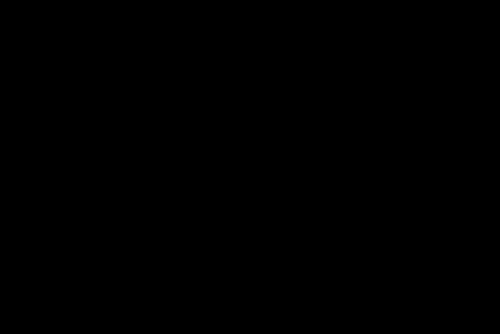

In [13]:
save("res_one.jpg",map(clamp01nan, reshape((S[1,:,]),rows,col)))
load("res_one.jpg")

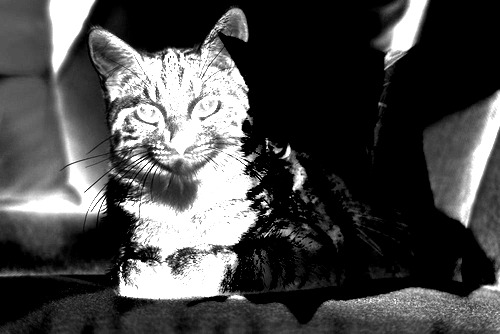

In [9]:
save("res_two.jpg",map(clamp01nan, reshape((S[2,:,]),rows,col)))
load("res_two.jpg")

In [10]:
S[1]

-3.6739075174858935

In [11]:
S[1,167000]

-3.313215334177253

In [12]:
S[2,167000]

0.5159685020388524

In [14]:
a

2×2 Array{Float64,2}:
  0.93528   0.353908
 -0.353908  0.93528 